In [ ]:
# Cài đặt các thư viện cần thiết
!pip install numpy pandas matplotlib scipy ace_tools


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict


In [ ]:
import os
import pandas as pd

# Đường dẫn đến thư mục chứa các file CSV
folder_path = "/content/hehe"  # Thay đổi đường dẫn thư mục

# Lấy danh sách tất cả các file .csv trong thư mục
files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Nhập dữ liệu từ các file CSV vào các DataFrame của pandas
data = {}
for ea in files:
    ea_name = ea.split(".csv")[0]  # Lấy tên file (không có đuôi .csv)
    file_path = os.path.join(folder_path, ea)  # Đường dẫn đầy đủ của file
    data[ea_name] = pd.read_csv(file_path)
    data[ea_name]['Datetime'] = pd.to_datetime(data[ea_name]['Datetime'])
    data[ea_name].set_index('Datetime', inplace=True)

# Hiển thị dữ liệu đầu tiên để kiểm tra
for ea_name, df in data.items():
    print(f"Data for {ea_name}:")
    print(df.head())


Data for 0.293_1:
                           c0        h0        l0        o0       v0  \
Datetime                                                               
2020-01-31 03:20:00  28915.35  28928.60  28913.10  28921.10   6430.0   
2020-02-03 02:55:00  28397.35  28408.35  28387.35  28403.60   8880.0   
2020-02-03 15:30:00  28443.10  28455.10  28428.85  28431.85   6805.0   
2020-02-04 02:30:00  28453.35  28453.60  28440.35  28444.35   3655.0   
2020-02-05 10:40:00  29012.85  29030.85  28919.35  28933.35  22930.0   

                     abs(c0-o0)/abs(h0-l0)  (c0-c1)/atr14  c0-c1  Spread  \
Datetime                                                                   
2020-01-31 03:20:00               0.364865      -0.232102  -5.50   -0.02   
2020-02-03 02:55:00               0.089552      -0.290155  -7.00   -0.02   
2020-02-03 15:30:00               0.584906       0.637744  10.50   -0.02   
2020-02-04 02:30:00               0.616667       0.534934   8.75   -0.02   
2020-02-05 10:40:00  

Loss streak transition probabilities

In [ ]:
# Hàm để phân tích chuỗi thua cho một EA
def analyze_loss_sequences(df):
    # Tạo cột mới để xác định trạng thái thua (True nếu thua, False nếu thắng)
    df['Loss'] = df['Profit'] < 0

    # Xác định chuỗi thua
    loss_sequences = []
    current_loss = 0
    for loss in df['Loss']:
        if loss:
            current_loss += 1
        else:
            if current_loss > 0:
                loss_sequences.append(current_loss)
            current_loss = 0

    # Nếu chuỗi thua kết thúc bằng một chuỗi thua
    if current_loss > 0:
        loss_sequences.append(current_loss)

    return loss_sequences

# Phân tích chuỗi thua cho mỗi EA và lưu kết quả
loss_sequences_data = {}
for ea_name, df in data.items():
    loss_sequences_data[ea_name] = analyze_loss_sequences(df)

# Hiển thị chuỗi thua của từng EA
for ea_name, sequences in loss_sequences_data.items():
    print(f"Loss sequences for {ea_name}: {sequences}")


Loss sequences for 0.293_1: [2, 2, 2, 1, 1, 3, 2, 2, 1, 5, 4, 3, 1, 2, 1, 3, 2, 3, 3, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1, 2, 1, 4, 1, 2, 2, 1, 1, 3, 2, 1, 1, 4, 1, 1, 2, 3, 2, 2, 7, 3, 1, 2, 1, 2, 1, 2, 8, 4, 5, 3, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 3, 2, 2, 1, 3, 2, 1, 1, 3, 3, 1, 2, 1, 1, 4, 4, 1, 1, 4, 2, 1, 3, 1, 3, 2, 2, 4, 2, 2, 3, 1, 2, 4, 2, 2, 3, 2, 1, 1, 1, 2, 3, 4, 3, 2, 2, 1, 1, 3, 2, 1, 2, 3, 1, 2, 2, 2, 1, 1, 5, 9, 1, 7, 2, 1, 1, 6, 2, 1, 2, 3, 1, 6, 1, 4, 1, 1, 3, 3, 1, 2, 4, 3, 1, 1, 2, 3, 2, 6, 3, 2, 2, 4, 1, 4, 2, 1, 1, 2, 6, 4, 3, 3, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 2, 3, 1, 1, 5, 2, 1, 4, 2, 1, 2, 2, 3, 4, 1, 1, 1, 3, 4, 1, 3, 4, 1, 3, 4, 2, 3, 1, 4, 2, 1, 3, 1, 2, 4, 5, 7, 3, 3, 1, 3, 2, 1, 1, 3, 1, 1, 2, 3, 2, 5, 2, 2, 2, 1, 1, 1, 7, 2, 2, 1, 1, 1, 1, 4, 2, 3, 3, 2, 1, 4, 1, 2, 2, 5, 1, 2, 1, 1, 2, 2, 2, 4, 6, 1, 1, 5, 2, 1, 1, 2, 4, 3, 2, 2, 2, 2, 3, 1, 2, 4, 1, 1, 1, 1, 2, 7, 1, 2, 3, 4, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 4, 3, 1, 1, 1, 3, 3, 1, 10, 4, 2, 2, 1, 3, 10, 

In [ ]:
# Hàm tính xác suất chuyển đổi giữa các chuỗi thua
def calculate_transition_probabilities(loss_sequences):
    # Tạo một từ điển để lưu xác suất chuyển đổi
    transition_matrix = defaultdict(lambda: defaultdict(int))

    # Xây dựng ma trận chuyển đổi
    previous_loss = None
    for seq in loss_sequences:
        if previous_loss is not None:
            transition_matrix[previous_loss][seq] += 1
        previous_loss = seq

    # Tính xác suất chuyển đổi (xác suất từ trạng thái i đến trạng thái j)
    transition_probabilities = defaultdict(dict)
    for state_from, transitions in transition_matrix.items():
        total_transitions = sum(transitions.values())
        for state_to, count in transitions.items():
            transition_probabilities[state_from][state_to] = count / total_transitions

    return transition_probabilities

# Tính xác suất chuyển đổi cho mỗi EA
transition_probabilities_data = {}
for ea_name, sequences in loss_sequences_data.items():
    transition_probabilities_data[ea_name] = calculate_transition_probabilities(sequences)

# Hiển thị xác suất chuyển đổi của từng EA
for ea_name, transition in transition_probabilities_data.items():
    print(f"Transition probabilities for {ea_name}: {dict(transition)}")


Transition probabilities for 0.293_1: {2: {2: 0.2535211267605634, 1: 0.45774647887323944, 3: 0.1267605633802817, 7: 0.02112676056338028, 8: 0.007042253521126761, 4: 0.08450704225352113, 6: 0.02112676056338028, 5: 0.02112676056338028, 10: 0.007042253521126761}, 1: {1: 0.4396135265700483, 3: 0.14009661835748793, 5: 0.03864734299516908, 2: 0.27053140096618356, 4: 0.07246376811594203, 7: 0.014492753623188406, 6: 0.00966183574879227, 10: 0.004830917874396135, 11: 0.004830917874396135, 8: 0.004830917874396135}, 3: {2: 0.36923076923076925, 1: 0.36923076923076925, 3: 0.12307692307692308, 4: 0.1076923076923077, 10: 0.015384615384615385, 7: 0.015384615384615385}, 5: {4: 0.15384615384615385, 3: 0.07692307692307693, 9: 0.07692307692307693, 2: 0.3076923076923077, 7: 0.07692307692307693, 1: 0.3076923076923077}, 4: {3: 0.14285714285714285, 1: 0.38095238095238093, 5: 0.047619047619047616, 4: 0.047619047619047616, 2: 0.35714285714285715, 6: 0.023809523809523808}, 7: {3: 0.25, 2: 0.375, 1: 0.375}, 8: {4

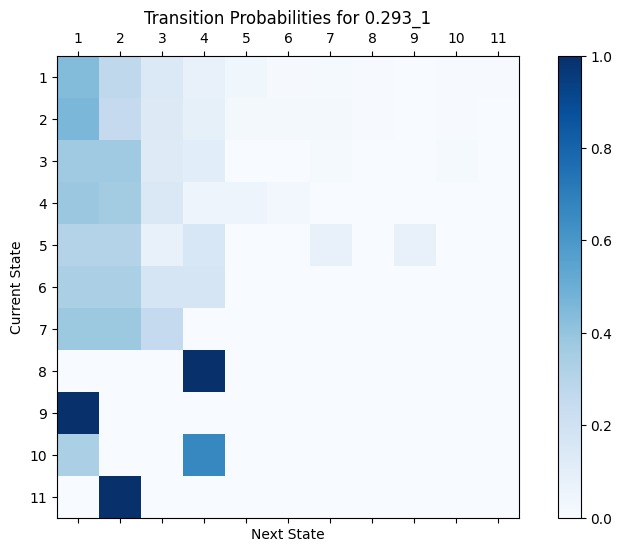

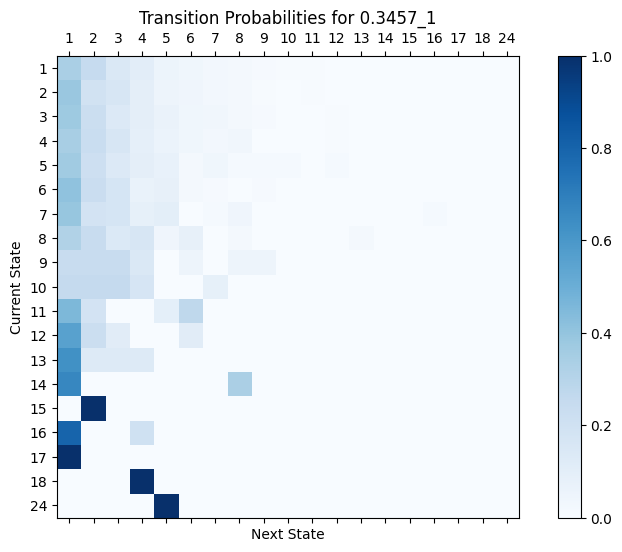

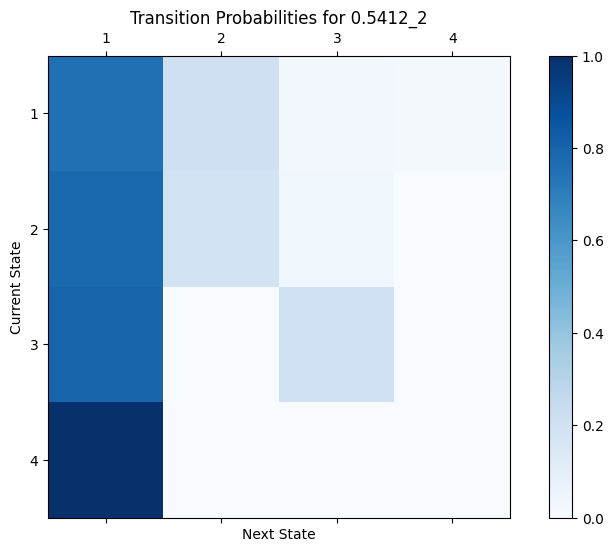

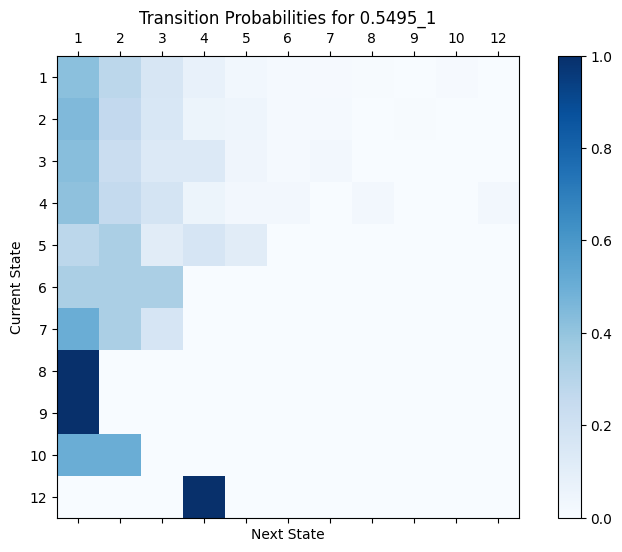

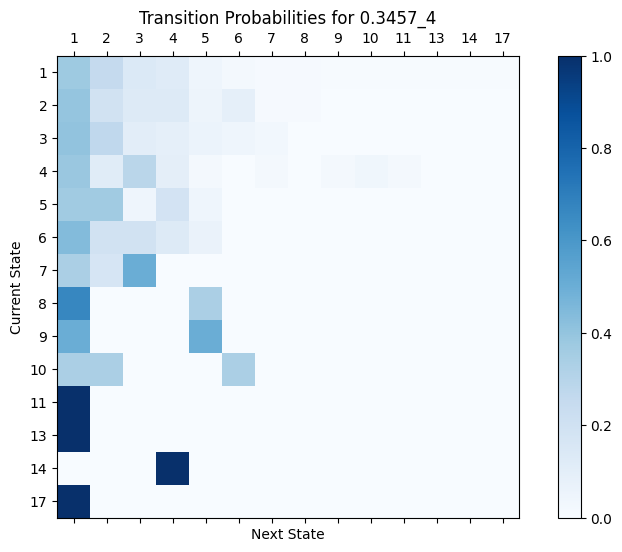

In [ ]:
# Hàm vẽ biểu đồ xác suất chuyển đổi cho mỗi EA
def plot_transition_probabilities(transition_probabilities, ea_name):
    # Get all unique states
    all_states = set()
    for state_from, transitions in transition_probabilities.items():
        all_states.add(state_from)
        all_states.update(transitions.keys())
    all_states = sorted(list(all_states))

    # Create a square transition matrix filled with 0s
    num_states = len(all_states)
    probabilities = np.zeros((num_states, num_states))

    # Fill the matrix with transition probabilities
    for i, state_from in enumerate(all_states):
        for j, state_to in enumerate(all_states):
            probabilities[i, j] = transition_probabilities.get(state_from, {}).get(state_to, 0)

    fig, ax = plt.subplots(figsize=(10, 6))
    cax = ax.matshow(probabilities, cmap='Blues')
    fig.colorbar(cax)

    ax.set_xticks(range(len(all_states)))
    ax.set_yticks(range(len(all_states)))
    ax.set_xticklabels(all_states)
    ax.set_yticklabels(all_states)

    ax.set_xlabel("Next State")
    ax.set_ylabel("Current State")
    ax.set_title(f"Transition Probabilities for {ea_name}")

    plt.show()

# Vẽ biểu đồ xác suất chuyển đổi cho từng EA
for ea_name, transition in transition_probabilities_data.items():
    plot_transition_probabilities(transition, ea_name)


**Allocation for each EA **

In [ ]:
# ------------------------------------------------------------------
#  ADVANCED CAPITAL ALLOCATION
#  - Volatility‑Based (inverse σ)
#  - Sharpe‑Ratio‑Based
#  - Drawdown‑Adjusted (inverse DD)
# ------------------------------------------------------------------

import numpy as np
import pandas as pd

# -------------------------------------------------------------
# 0.  THÔNG SỐ
# -------------------------------------------------------------
ACCOUNT_BALANCE   = 10000          # tổng vốn phân bổ
RISKFREE_RATE     = 0.0             # risk‑free rate khi tính Sharpe
MIN_SHARPE_WEIGHT = 0.0             # gán 0 nếu Sharpe âm

# -------------------------------------------------------------
# 1.  HÀM TÍNH CHỈ SỐ CHO MỖI EA
# -------------------------------------------------------------
def compute_metrics(df: pd.DataFrame):
    """Tính volatility, sharpe ratio, max‑drawdown % trên chuỗi P/L (USD)."""
    pl          = df['Profit'].astype(float)        # Profit/Loss từng lệnh
    vol         = pl.std(ddof=0)                                 # σ lợi nhuận
    mean_ret    = pl.mean()
    sharpe      = (mean_ret - RISKFREE_RATE) / vol if vol != 0 else 0.0

    cum_pl      = pl.cumsum()
    running_max = cum_pl.cummax()
    drawdown    = (running_max - cum_pl)                         # drawdown tuyệt đối
    if running_max.max() == 0:
        dd_pct = 0.0
    else:
        dd_pct = drawdown.max() / running_max.max()              # drawdown %
    return vol, sharpe, dd_pct

metrics = {}      # ea_name ➜ (σ, Sharpe, DD%)
for ea_name, df in data.items():
    metrics[ea_name] = compute_metrics(df)

# -------------------------------------------------------------
# 2.  XÂY DỰNG CÁC PHÂN BỔ
# -------------------------------------------------------------
# Tách từng chỉ số thành dict
vol_dict    = {ea: m[0] for ea, m in metrics.items()}
sharpe_dict = {ea: max(m[1], MIN_SHARPE_WEIGHT) for ea, m in metrics.items()}
dd_dict     = {ea: m[2] for ea, m in metrics.items()}

# -- 2.1  Volatility‑Based (trọng số ∝ 1/σ)
inv_vol          = {ea: 1/v if v != 0 else 0 for ea, v in vol_dict.items()}
total_inv_vol    = sum(inv_vol.values())
vol_weights_pct  = {ea: 100 * w / total_inv_vol for ea, w in inv_vol.items()}

# -- 2.2  Sharpe‑Based  (trọng số ∝ Sharpe)
total_sharpe     = sum(sharpe_dict.values())
sharpe_weights_pct = {ea: 100 * s / total_sharpe if total_sharpe > 0 else 0
                      for ea, s in sharpe_dict.items()}

# -- 2.3  Drawdown‑Adjusted (trọng số ∝ 1/DD)
inv_dd           = {ea: 1/d if d > 0 else 0 for ea, d in dd_dict.items()}
total_inv_dd     = sum(inv_dd.values())
dd_weights_pct   = {ea: 100 * w / total_inv_dd for ea, w in inv_dd.items()}

# -------------------------------------------------------------
# 3.  CHUYỂN ĐỔI % ➜ SỐ TIỀN
# -------------------------------------------------------------
def allocate(capital, weights_pct):
    return {ea: capital * pct/100 for ea, pct in weights_pct.items()}

alloc_vol     = allocate(ACCOUNT_BALANCE, vol_weights_pct)
alloc_sharpe  = allocate(ACCOUNT_BALANCE, sharpe_weights_pct)
alloc_dd      = allocate(ACCOUNT_BALANCE, dd_weights_pct)

# -------------------------------------------------------------
# 4.  IN KẾT QUẢ
# -------------------------------------------------------------
def pretty_print(title, weights_pct, alloc):
    print(f"\n===== {title} =====")
    for ea in weights_pct:
        print(f"{ea:10s}:  "
              f"weight = {weights_pct[ea]:6.2f}%   "
              f"capital = ${alloc[ea]:,.2f}")

print(f"\n=== ACCOUNT BALANCE: ${ACCOUNT_BALANCE:,.0f} ===")
pretty_print("Volatility‑Based Position Sizing", vol_weights_pct, alloc_vol)
pretty_print("Sharpe‑Ratio‑Based Allocation",    sharpe_weights_pct, alloc_sharpe)
pretty_print("Drawdown‑Adjusted Allocation",     dd_weights_pct, alloc_dd)

# -------------------------------------------------------------
# 5.  (TÙY CHỌN) LƯU KẾT QUẢ RA CSV
# -------------------------------------------------------------
summary_df = (pd.DataFrame({
                'EA'           : list(metrics.keys()),
                'Volatility'   : [vol_dict[ea]    for ea in metrics],
                'Sharpe'       : [sharpe_dict[ea] for ea in metrics],
                'MaxDrawdown%' : [dd_dict[ea]     for ea in metrics],
                'WeightVol%'   : [vol_weights_pct[ea]  for ea in metrics],
                'WeightSharpe%': [sharpe_weights_pct[ea] for ea in metrics],
                'WeightDD%'    : [dd_weights_pct[ea] for ea in metrics],
                'AllocVol$'    : [alloc_vol[ea]   for ea in metrics],
                'AllocSharpe$' : [alloc_sharpe[ea] for ea in metrics],
                'AllocDD$'     : [alloc_dd[ea]    for ea in metrics]
             })
             .set_index('EA'))

summary_df.to_csv("ea_allocation_summary.csv")
print("\n=> Đã lưu bảng tổng hợp vào ea_allocation_summary.csv")



=== ACCOUNT BALANCE: $10,000 ===

===== Volatility‑Based Position Sizing =====
0.293_1   :  weight =  16.67%   capital = $1,667.33
0.3457_1  :  weight =  17.52%   capital = $1,751.80
0.5412_2  :  weight =  33.56%   capital = $3,355.73
0.5495_1  :  weight =  17.80%   capital = $1,780.26
0.3457_4  :  weight =  14.45%   capital = $1,444.88

===== Sharpe‑Ratio‑Based Allocation =====
0.293_1   :  weight =  13.52%   capital = $1,352.35
0.3457_1  :  weight =   0.00%   capital = $0.00
0.5412_2  :  weight =  33.67%   capital = $3,367.45
0.5495_1  :  weight =  27.32%   capital = $2,731.95
0.3457_4  :  weight =  25.48%   capital = $2,548.25

===== Drawdown‑Adjusted Allocation =====
0.293_1   :  weight =   8.94%   capital = $894.39
0.3457_1  :  weight =   2.53%   capital = $253.11
0.5412_2  :  weight =  19.11%   capital = $1,911.41
0.5495_1  :  weight =  32.60%   capital = $3,260.25
0.3457_4  :  weight =  36.81%   capital = $3,680.83

=> Đã lưu bảng tổng hợp vào ea_allocation_summary.csv


Risk per trades

In [ ]:
# ================================================================
#  IMPLEMENT Risk‑Parity theo Max Drawdown
# ================================================================
DRAW_REF      = 0.20      # 20 % reference DD (mặc định)
BASE_RPT_PCT  = 1.0       # 1 % account nếu DD = DRAW_REF
CAP_RPT_PCT   = 3.0       # trần risk per trade (%)

def risk_parity_rpt(dd_dict,
                    draw_ref=DRAW_REF,
                    base_pct=BASE_RPT_PCT,
                    cap_pct=CAP_RPT_PCT):
    """
    Trả về dict rpt_pct (%, trên account của từng EA)
    và dict rpt_usd (USD risk cố định / lệnh).
    Giả định mỗi EA được quản lý 10 000 USD (ACCOUNT_PER_EA).
    """
    ACCOUNT_PER_EA = 10_000

    rpt_pct = {}
    rpt_usd = {}
    for ea, dd in dd_dict.items():
        # dd là số dạng 0.149  ->  14.9%
        if dd <= 0:
            pct = 0.0
        else:
            pct = base_pct * (draw_ref / dd)
        pct = min(pct, cap_pct)      # kẹp trần
        rpt_pct[ea] = pct
        rpt_usd[ea] = pct/100 * ACCOUNT_PER_EA
    return rpt_pct, rpt_usd

# --- Gọi hàm và in ra kết quả ----------------------------------
rpt_pct, rpt_usd = risk_parity_rpt(dd_dict)

print("\n=== RISK‑PARITY theo Max Drawdown (ref 20 %) ===")
for ea in rpt_pct:
    print(f"{ea:10s}:  RPT = {rpt_pct[ea]:5.2f}%   "
          f"(≈ ${rpt_usd[ea]:,.0f} risk mỗi trade)")



=== RISK‑PARITY theo Max Drawdown (ref 20 %) ===
0.293_1   :  RPT =  0.34%   (≈ $34 risk mỗi trade)
0.3457_1  :  RPT =  0.10%   (≈ $10 risk mỗi trade)
0.5412_2  :  RPT =  0.73%   (≈ $73 risk mỗi trade)
0.5495_1  :  RPT =  1.24%   (≈ $124 risk mỗi trade)
0.3457_4  :  RPT =  1.40%   (≈ $140 risk mỗi trade)


In [ ]:
# ---------------------------------------------------------------
#  TÍNH AVERAGE‑LOSS VÀ THÊM CỘT RISK‑REWARD RATIO CHO MỖI EA
# ---------------------------------------------------------------

avg_loss_dict = {}

for ea_name, df in data.items():
    # 1) các lệnh thua
    losing_trades = df.loc[df['Profit'] < 0, 'Profit'].abs()
    avg_loss      = losing_trades.mean()          # luôn dương
    avg_loss_dict[ea_name] = avg_loss

    # 2) khởi tạo cột RRR mặc định NaN
    df['RRR'] = np.nan

    # 3) gán giá trị theo quy tắc:
    #    - lệnh thua  →  -1
    #    - lệnh thắng →  Result / AvgLoss
    mask_loss  = df['Profit'] < 0
    mask_win   = df['Profit'] >= 0

    df.loc[mask_loss, 'RRR'] = -1
    if pd.notna(avg_loss) and avg_loss != 0:
        df.loc[mask_win,  'RRR'] = df.loc[mask_win, 'Profit'] / avg_loss

    # 4) lưu lại (đã in‑place, nhưng giữ cho rõ)
    data[ea_name] = df

# ---------------------------------------------------------------
#  IN KẾT QUẢ
# ---------------------------------------------------------------
print("=== Average losing trade (USD) của mỗi EA ===")
for ea, avg in avg_loss_dict.items():
    print(f"{ea:10s}:  {avg:,.2f} USD")

print("\nCột 'RRR' đã được cập nhật: lệnh thua = -1, lệnh thắng = Profit / AvgLoss.")


=== Average losing trade (USD) của mỗi EA ===
0.293_1   :  40.46 USD
0.3457_1  :  35.11 USD
0.5412_2  :  44.15 USD
0.5495_1  :  34.87 USD
0.3457_4  :  33.37 USD

Cột 'RRR' đã được cập nhật: lệnh thua = -1, lệnh thắng = Profit / AvgLoss.


Original Equity Curve

                     0.293_1  0.3457_1  0.5412_2  0.5495_1  0.3457_4  \
Datetime                                                               
2019-02-11 08:10:00      0.0       0.0       0.0    127.48       0.0   
2019-02-12 03:55:00      0.0       0.0       0.0    199.93       0.0   
2019-02-12 17:15:00      0.0       0.0       0.0    230.66       0.0   
2019-02-13 13:15:00      0.0       0.0       0.0    313.08       0.0   
2019-02-13 17:00:00      0.0       0.0       0.0    263.95       0.0   

                     Equity Portfolio Original  
Datetime                                        
2019-02-11 08:10:00                     127.48  
2019-02-12 03:55:00                     199.93  
2019-02-12 17:15:00                     230.66  
2019-02-13 13:15:00                     313.08  
2019-02-13 17:00:00                     263.95  
                     0.293_1  0.3457_1  0.5412_2  0.5495_1  0.3457_4  \
Datetime                                                               
2025-03-

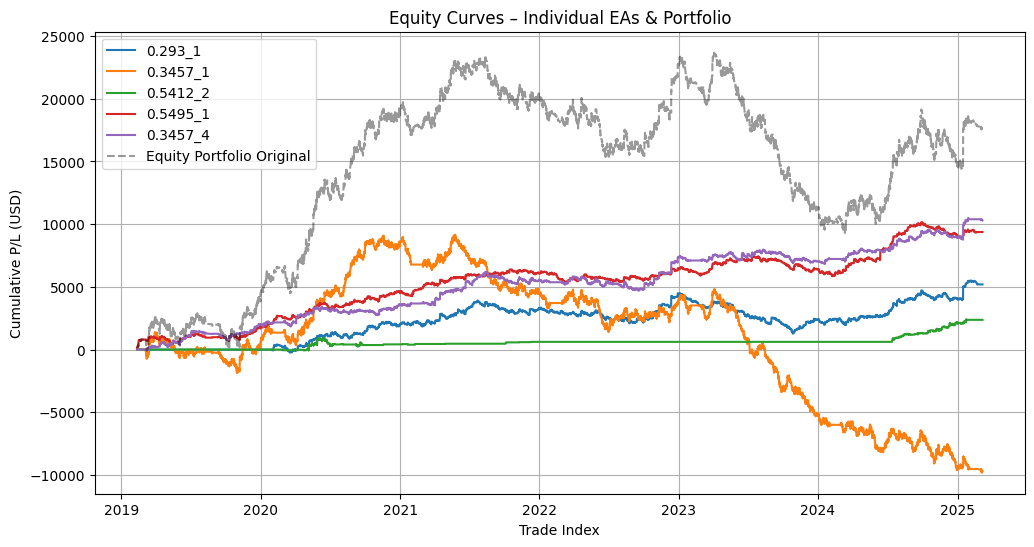

In [ ]:
# ------------------------------------------------------------------
# 1) THÊM CỘT “Equity Original” CHO TỪNG EA
# ------------------------------------------------------------------
for ea_name, df in data.items():
    # bảo đảm index Datetime đã sắp xếp
    df.sort_index(inplace=True)

    # lũy kế Result theo index gốc
    df["Equity Original"] = df["Profit"].cumsum()
    data[ea_name] = df     # df thay đổi in‑place

# ------------------------------------------------------------------
# 2) GHÉP CỘT EQUITY CỦA TẤT CẢ EA THEO Datetime INDEX
#    - dùng outer‑join (union của mọi timestamp)
#    - ffill giữ nguyên equity khi EA đã ngừng, NaN đầu bảng ➜ 0
# ------------------------------------------------------------------
equity_series = {ea: df["Equity Original"] for ea, df in data.items()}

# concat theo index Datetime, outer‑join
equity_df = pd.concat(equity_series, axis=1)          # cột là tên EA
equity_df = equity_df.sort_index()                    # chắc chắn thứ tự thời gian

# forward‑fill để giữ nguyên giá trị cuối khi EA dừng giao dịch
equity_df = equity_df.ffill().fillna(0)

# ------------------------------------------------------------------
# 3) TÍNH CỘT EQUITY PORTFOLIO
# ------------------------------------------------------------------
equity_df["Equity Portfolio Original"] = equity_df.sum(axis=1)

# ------------------------------------------------------------------
# 4) KIỂM TRA KẾT QUẢ
# ------------------------------------------------------------------
print(equity_df.head())
print(equity_df.tail())
# equity_df.to_csv("equity_portfolio_original.csv")

# Plot all equity curves on a single chart
plt.figure(figsize=(12, 6))
for column in equity_df.columns:
    if column != 'Equity Portfolio Original':
        plt.plot(equity_df[column], label=column)
    else:
        plt.plot(equity_df[column], label=column, linestyle='--', color='black', alpha=0.4)

plt.title("Equity Curves – Individual EAs & Portfolio")
plt.xlabel("Trade Index")
plt.ylabel("Cumulative P/L (USD)")
plt.legend()
plt.grid(True)
plt.show()


Allocation Equity Curve

In [ ]:
# ================================================================
#  THÊM CỘT  Result Allocation  &  Equity Allocation  CHO TỪNG EA
# ================================================================
# giả định rpt_usd là dict:  ea_name ➜ fixed USD risk/lệnh
#   (đã tạo ở đoạn risk_parity_rpt)

for ea_name, df in data.items():
    # 1) lấy USD risk per trade cho EA này
    risk_usd = rpt_usd.get(ea_name, None)
    if risk_usd is None:
        raise ValueError(f"Chưa có giá trị risk_per_trade cho {ea_name}")

    # 2) tạo cột Result Allocation
    #    - nếu RRR NaN (chưa tính được) → gán 0
    df['Result Allocation'] = df['RRR'].fillna(0) * risk_usd

    # 3) cột Equity Allocation = lũy kế
    df['Equity Allocation'] = df['Result Allocation'].cumsum()

    # 4) lưu lại (df thay đổi in‑place)
    data[ea_name] = df

# ---------------------------------------------------------------
#  KIỂM TRA NHANH
# ---------------------------------------------------------------
for ea_name, df in list(data.items())[:2]:   # in thử 2 EA đầu
    print(f"\n=== {ea_name} (rows 0‑4) ===")
    print(df[['Profit', 'RRR', 'Result Allocation', 'Equity Allocation']].head())



=== 0.293_1 (rows 0‑4) ===
                     Profit       RRR  Result Allocation  Equity Allocation
Datetime                                                                   
2020-01-31 03:20:00  -49.34 -1.000000         -34.101320         -34.101320
2020-02-03 02:55:00  -16.66 -1.000000         -34.101320         -68.202639
2020-02-03 15:30:00   38.59  0.953888          32.528844         -35.673796
2020-02-04 02:30:00  225.77  5.580703         190.309330         154.635534
2020-02-05 10:40:00    8.76  0.216534           7.384107         162.019641

=== 0.3457_1 (rows 0‑4) ===
                     Profit       RRR  Result Allocation  Equity Allocation
Datetime                                                                   
2019-03-05 10:31:00  -26.04 -1.000000          -9.650593          -9.650593
2019-03-05 11:35:00  -35.33 -1.000000          -9.650593         -19.301186
2019-03-05 14:15:00  -34.92 -1.000000          -9.650593         -28.951779
2019-03-05 16:03:00   -3.58 -1.

                     0.293_1  0.3457_1  0.5412_2     0.5495_1  0.3457_4  \
Datetime                                                                  
2019-02-11 08:10:00      0.0       0.0       0.0   454.470628       0.0   
2019-02-12 03:55:00      0.0       0.0       0.0   712.757395       0.0   
2019-02-12 17:15:00      0.0       0.0       0.0   822.310912       0.0   
2019-02-13 13:15:00      0.0       0.0       0.0  1116.141075       0.0   
2019-02-13 17:00:00      0.0       0.0       0.0   991.834223       0.0   

                     Equity Portfolio Allocation  
Datetime                                          
2019-02-11 08:10:00                   454.470628  
2019-02-12 03:55:00                   712.757395  
2019-02-12 17:15:00                   822.310912  
2019-02-13 13:15:00                  1116.141075  
2019-02-13 17:00:00                   991.834223  
                         0.293_1     0.3457_1     0.5412_2      0.5495_1  \
Datetime                                 

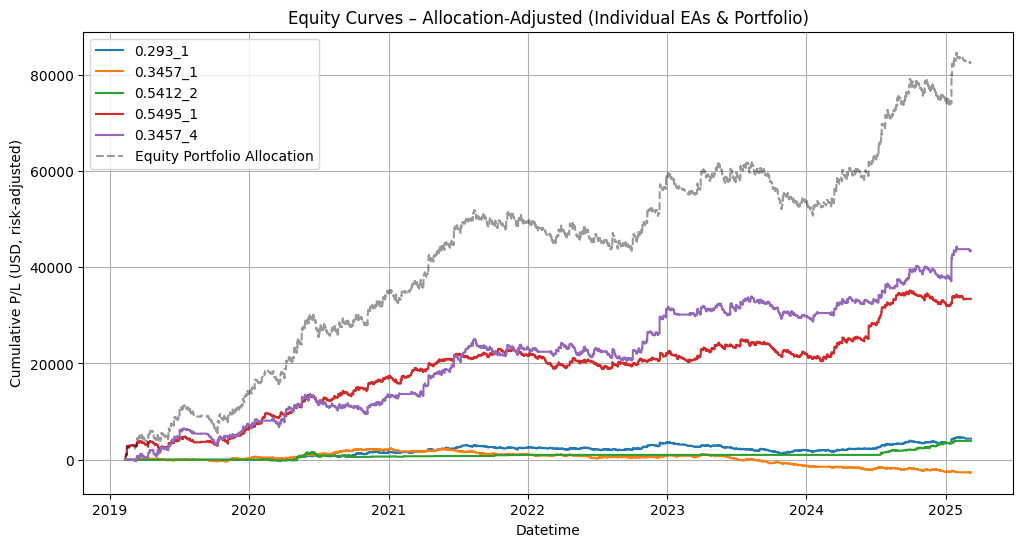

In [ ]:
import matplotlib.pyplot as plt

# ------------------------------------------------------------------
# 1)  GHÉP “Equity Allocation” CỦA MỌI EA THEO Datetime index
# ------------------------------------------------------------------
alloc_series = {ea: df["Equity Allocation"] for ea, df in data.items()}

alloc_df = (
    pd.concat(alloc_series, axis=1)  # outer‑join Datetime
      .sort_index()
      .ffill()                       # giữ nguyên sau khi EA dừng
      .fillna(0)                     # NaN đầu bảng → 0
)

# ------------------------------------------------------------------
# 2)  CỘT “Equity Portfolio Allocation” = tổng các EA
# ------------------------------------------------------------------
alloc_df["Equity Portfolio Allocation"] = alloc_df.sum(axis=1)

# ------------------------------------------------------------------
# 3)  KIỂM TRA & LƯU (tuỳ chọn)
# ------------------------------------------------------------------
print(alloc_df.head())
print(alloc_df.tail())
# alloc_df.to_csv("equity_portfolio_allocation.csv")

# ------------------------------------------------------------------
# 4)  VẼ ĐƯỜNG VỐN  (Allocation)
# ------------------------------------------------------------------
plt.figure(figsize=(12, 6))

for col in alloc_df.columns:
    if col != "Equity Portfolio Allocation":
        plt.plot(alloc_df[col], label=col)        # từng EA
    else:
        plt.plot(alloc_df[col],
                 label=col,
                 linestyle="--",
                 color="black",
                 alpha=0.4)                       # danh mục

plt.title("Equity Curves – Allocation‑Adjusted (Individual EAs & Portfolio)")
plt.xlabel("Datetime")
plt.ylabel("Cumulative P/L (USD, risk‑adjusted)")
plt.legend()
plt.grid(True)
plt.show()


Compare

In [ ]:
import pandas as pd
import numpy as np
import math

# --- helper functions -------------------------------------------------
def max_drawdown(series):
    running_max = series.cummax()
    drawdown = running_max - series
    return drawdown.max()

def portfolio_metrics(equity_series):
    """Return dict with required metrics for a cumulative equity series"""
    pnl = equity_series.diff().fillna(0)

    avg_win  = pnl[pnl > 0].mean()
    avg_loss = pnl[pnl < 0].abs().mean()

    total_profit = pnl[pnl > 0].sum()
    total_loss   = pnl[pnl < 0].abs().sum()
    profit_ratio = total_profit / total_loss if total_loss != 0 else np.nan

    mdd = max_drawdown(equity_series)

    sharpe = pnl.mean() / pnl.std(ddof=0) if pnl.std(ddof=0) != 0 else np.nan

    ret_over_dd = equity_series.iloc[-1] / mdd if mdd != 0 else np.nan

    return {
        "Sharpe": round(sharpe, 4),
        "Max DD": round(mdd, 2),
        "Avg Win": round(avg_win, 2),
        "Avg Loss": round(avg_loss, 2),
        "Profit Ratio": round(profit_ratio, 4),
        "Return/MaxDD": round(ret_over_dd, 4),
    }

# --- assume equity_df and alloc_df already exist in the notebook -----
original_series   = equity_df["Equity Portfolio Original"]
allocation_series = alloc_df["Equity Portfolio Allocation"]

metrics_original   = portfolio_metrics(original_series)
metrics_allocation = portfolio_metrics(allocation_series)

comparison_df = pd.DataFrame([metrics_original, metrics_allocation],
                             index=["Portfolio Original", "Portfolio Allocation"])

comparison_df


,Sharpe,Max DD,Avg Win,Avg Loss,Profit Ratio,Return/MaxDD
Portfolio Original,0.0147,14373.52,57.85,36.15,1.0441,1.2213
Portfolio Allocation,0.0349,11033.03,70.76,38.42,1.1944,7.4669
